# Multiple Linear Regression

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Importing the dataset

In [2]:
dataset=pd.read_csv("insurance.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1334 non-null   int64  
 1   sex       1334 non-null   object 
 2   bmi       1325 non-null   float64
 3   children  1334 non-null   int64  
 4   smoker    1334 non-null   object 
 5   region    1334 non-null   object 
 6   charges   1334 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.1+ KB


## Update the Missing Values

In [4]:
dataset.isnull().sum()

age         0
sex         0
bmi         9
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: ylabel='Frequency'>

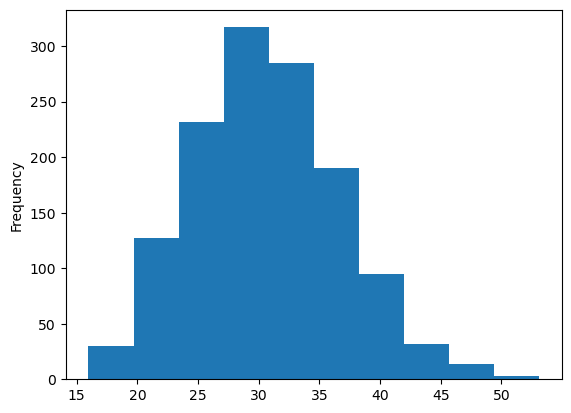

In [5]:
dataset['bmi'].plot(kind='hist')

In [6]:
dataset.describe()

,age,bmi,children,charges
count,1334.000000,1325.000000,1334.000000,1334.000000
mean,39.186657,30.642668,1.095202,13283.517023
std,14.038061,6.107192,1.205423,12123.263508
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4740.287150
50%,39.000000,30.305000,1.000000,9369.615750
75%,51.000000,34.600000,2.000000,16746.657400
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
bmi_mean=dataset['bmi'].mean()
dataset['bmi'].fillna(bmi_mean,inplace=True)

## Split the dataset into independent and Dependent variables

In [8]:
#X=dataset.drop('charges', axis=1)
y=dataset[['charges']]

In [9]:
#Experiment 
X=dataset[['age','bmi','smoker','children']]

In [10]:
X.sample()

,age,bmi,smoker,children
1309,19,34.7,yes,2


## Handling Categorical Variables

In [11]:
dataset['sex'].value_counts()

male      673
female    661
Name: sex, dtype: int64

In [12]:
dataset['smoker'].value_counts()

no     1060
yes     274
Name: smoker, dtype: int64

In [13]:
dataset['region'].value_counts()

southeast    364
northwest    325
northeast    323
southwest    322
Name: region, dtype: int64

In [14]:
X=pd.get_dummies(X,drop_first=True)

In [15]:
X.head()

,age,bmi,children,smoker_yes
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0


## Splitting the dataset into the Training set, Test set and validation set
### The Training Set
It is the set of data that is used to train and make the model learn the hidden features/patterns in the data.

### The Test Set
The test set is a separate set of data used to test the model after completing the training. It provides an unbiased final model performance metric in terms of accuracy, precision, etc. To put it simply, it answers the question of "How well does the model perform?"

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                  test_size=.20,
                                                random_state=42)


## Training the Multiple Linear Regression model on the Training set

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train.values,y_train)

LinearRegression()

## Intercept and Coefficient

In [18]:
print("coefficients", regressor.coef_)

coefficients [[  256.18251283   303.12041557   507.03761385 23534.18769506]]


In [19]:
print("intercetpt", regressor.intercept_)

intercetpt [-11411.98569716]


## Validation set

In [20]:
#y_test = actual value 
#y_pred = predicited value
y_pred=regressor.predict(X_test.values)
y_pred[:5]

array([[ 5034.45060851],
       [13202.21044307],
       [14203.47161934],
       [32009.28382865],
       [ 9180.540182  ]])

In [21]:
y_test.head()

,charges
898,4661.28635
1062,8978.18510
1252,11436.73815
298,38746.35510
237,4463.20510


### RMSE and R Square

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"r2_score: {r2_score(y_test,y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test,y_pred):.0f}")
print(f"MSE: {math.sqrt(mean_squared_error(y_test,y_pred)):.0f}")

r2_score: 0.79
MSE: 35547343
MSE: 5962


## Validation case scenario:
#### case1. Predict how much a person of age 53, bmi 36.6, 3 children, male, non smoker, from south-west  need to pay? 

In [23]:
X.head(1)

,age,bmi,children,smoker_yes
0,19,27.9,0,1


In [25]:
#regressor.predict([[53,36.6,3,1,0,0,0,1]])

#### case2. Predict how much a person of age 50, bmi 27.075, 1 children, female, nonsmoker, from north-east how much need to pay?  

In [26]:
#regressor.predict([[50,27.075,1,0,0,0,0,0]])

### Statistical Models

In [27]:
#!pip install statsmodels
import statsmodels.api as sm

In [28]:
X.head()

,age,bmi,children,smoker_yes
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0


In [29]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [30]:
X=sm.add_constant(X)

In [31]:
X.sample()

,const,age,bmi,children,smoker_yes
610,1.0,47,29.37,1,0


In [32]:
model=sm.OLS(y,X).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     994.9
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:12:29   Log-Likelihood:                -13512.
No. Observations:                1334   AIC:                         2.703e+04
Df Residuals:                    1329   BIC:                         2.706e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.216e+04    945.827    -12.851      0.000    -1.4e+04   -1.03e+04
age          258.2273     11.935     21.636      0.000     234.813     281.641
bmi          323.6029     27.499     11.768      0.000     269.657     377.549
children     468.9803    138.171      3.394      0.001     197.923     740.038
smoker_yes  2.381e+04    411.865     57.804      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      298.996   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              711.979
Skew:                           1.211   Prob(JB):                    2.49e-155
Kurtosis:                       5.634   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""